In [2]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

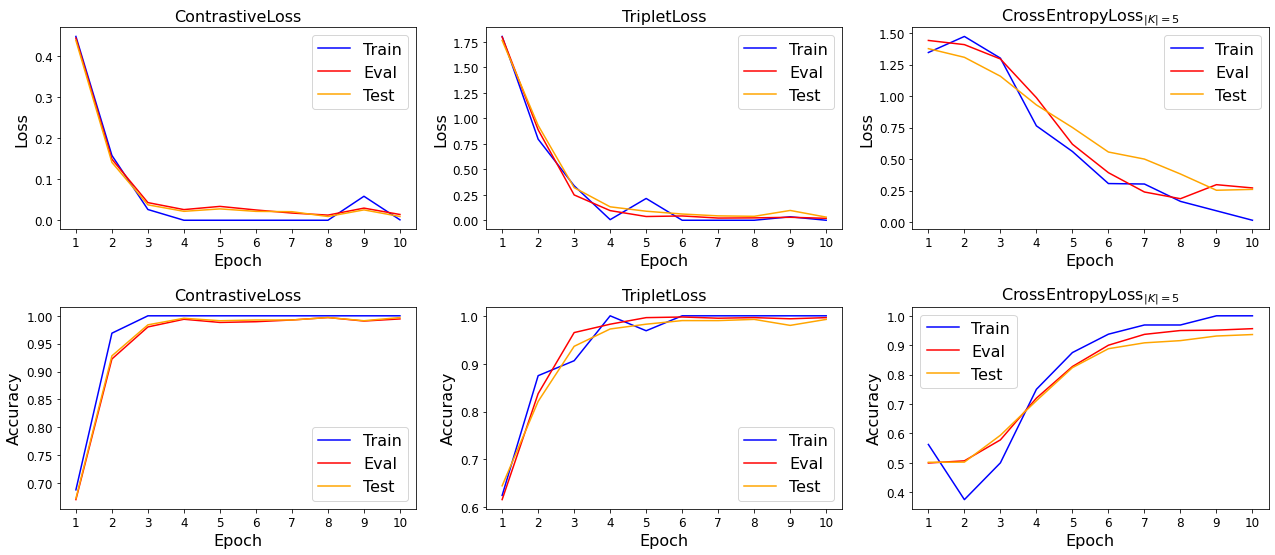

In [29]:
titles = ["ContrastiveLoss", "TripletLoss", "CrossEntropyLoss$_{|K|=5}$"]
stats_dir_cont = "outputs/ContrastiveLoss_omicron_vs_other_Pmax_R0.2_D0.2_E10_LR_0.0001_B32_M2.0/stats"
stats_dir_trip = "outputs/TripletLoss_omicron_vs_other_Pmax_R0.2_D0.2_E10_LR_0.0001_B32_M2.0/stats"
stats_dir_cros = "outputs/SoftmaxLoss_omicron_vs_other_Pmax_R0.0_D0.0_E10_LR_1e-05_B32_T0.0_CD/stats"

stats = {}

for title, dir in zip(titles, [stats_dir_cont, stats_dir_trip, stats_dir_cros]):
    train = pd.read_csv(os.path.join(dir, "Train.csv"))
    eval = pd.read_csv(os.path.join(dir, "Eval.csv"))
    test = pd.read_csv(os.path.join(dir, "Test.csv"))
    stats[title] = (train, eval, test)
    

# plot loss and accuracy figures. losses at top row, accuracies at bottom row. 1 column for each stats file
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

for i, title in enumerate(titles):
    axs[0, i].plot(stats[title][0]["epoch"]+1, stats[title][0]["loss"], label="Train", color="blue")
    axs[0, i].plot(stats[title][1]["epoch"]+1, stats[title][1]["loss"], label="Eval", color="red")
    axs[0, i].plot(stats[title][2]["epoch"]+1, stats[title][2]["loss"], label="Test", color="orange")
    axs[0, i].set_title(title)
    axs[0, i].set_xlabel("Epoch")
    axs[0, i].set_ylabel("Loss")
    axs[0, i].legend()
    axs[0, i].set_xticks(stats[title][0]["epoch"]+1)  # Set x-ticks for each epoch

    axs[1, i].plot(stats[title][0]["epoch"]+1, stats[title][0]["accuracy"], label="Train", color="blue")
    axs[1, i].plot(stats[title][1]["epoch"]+1, stats[title][1]["accuracy"], label="Eval", color="red")
    axs[1, i].plot(stats[title][2]["epoch"]+1, stats[title][2]["accuracy"], label="Test", color="orange")
    axs[1, i].set_title(title)
    axs[1, i].set_xlabel("Epoch")
    axs[1, i].set_ylabel("Accuracy")
    axs[1, i].legend()
    axs[1, i].set_xticks(stats[title][0]["epoch"]+1)  # Set x-ticks for each epoch

font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
plt.rc('xtick', labelsize=font_size-4)
plt.rc('ytick', labelsize=font_size-4)
plt.rc('legend', fontsize=font_size)
plt.rc('figure', titlesize=font_size)
plt.tight_layout()
plt.savefig("figures/loss_accuracy.pdf")
plt.show()

